In [5]:
import json
import pandas as pd

# Load the JSON file
with open("../data/cancel_policy_in_booking.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert into a DataFrame for easier analysis
df = pd.DataFrame(data)
df.head()


,_id,details,no
0,{'$oid': '66ed66ad7403f839a60485d2'},{cancelPolicy=CXL: NO CANCELLATION CHARGE APPL...,104361
1,{'$oid': '66ed66dc7403f839a60485d3'},{cancelPolicy=CXL: NO CANCELLATION CHARGE APPL...,104362
2,{'$oid': '66ee3dde7403f839a60485dc'},{cancelPolicy=CXL: 72H PRIOR OR 1NT FEE/ 1NT D...,104368
3,{'$oid': '66eeb8c03f1d45bc94005075'},{cancelPolicy=CXL: 72H PRIOR OR 1NT FEE/ 1NT D...,104369
4,{'$oid': '66ef769b3f1d45bc94005076'},{cancelPolicy=CXL: CXL 1800 HTL TIME ON 22SEP2...,104370


In [10]:
# Show just the "details" field
df["details"].head(10).tolist()

['{cancelPolicy=CXL: NO CANCELLATION CHARGE APPLIES PRIOR TO 18:00 LOCAL TIME UP\nTO 2 DAYS PRIOR TO ARRIVAL. BEYOND THAT TIME THE FIRST NIGHT\nWILL BE CHARGED.}',
 '{cancelPolicy=CXL: NO CANCELLATION CHARGE APPLIES PRIOR TO 18:00 LOCAL TIME UP\nTO 2 DAYS PRIOR TO ARRIVAL. BEYOND THAT TIME THE FIRST NIGHT\nWILL BE CHARGED.}',
 '{cancelPolicy=CXL: 72H PRIOR OR 1NT FEE/ 1NT DEPOSIT AT BOOKING}',
 '{cancelPolicy=CXL: 72H PRIOR OR 1NT FEE/ 1NT DEPOSIT AT BOOKING}',
 '{cancelPolicy=CXL: CXL 1800 HTL TIME ON 22SEP24-FEE 1 NIGHT-INCL TAX-FEES MUST\nBE CANCELLED BY 6PM LOCAL HOTEL TIME 1 DAY PRIOR TO ARRIVAL TO\nAVOID PENALTY OF 1 NIGHT ROOM AND SERVICE CHARGE.}',
 '{cancelPolicy=CXL: CXL 1800 HTL TIME ON 21SEP24-FEE 1 NIGHT-INCL TAX-FEES MUST\nBE CANCELLED BY 6PM LOCAL HOTEL TIME 1 DAY PRIOR TO ARRIVAL TO\nAVOID PENALTY OF 1 NIGHT ROOM AND SERVICE CHARGE.}',
 '{cancelPolicy=CXL: CXL 1 DAY PRIOR TO ARRIVAL}',
 '{cancelPolicy=CXL: 5616.70 THB CXL FEE PER ROOM CANCELLATION PERMITTED UP TO\n1DAYS

In [9]:
import re

def normalize(text: str) -> str:
    if not isinstance(text, str):
        return ""
    s = re.sub(r"\s+", " ", text.replace("cancelPolicy=", "").strip()).upper()  # uppercase & collapse spaces
    return s

df["normalized"] = df["details"].apply(normalize)
df[["no", "normalized"]].head(10)

,no,normalized
0,104361,{CXL: NO CANCELLATION CHARGE APPLIES PRIOR TO ...
1,104362,{CXL: NO CANCELLATION CHARGE APPLIES PRIOR TO ...
2,104368,{CXL: 72H PRIOR OR 1NT FEE/ 1NT DEPOSIT AT BOO...
3,104369,{CXL: 72H PRIOR OR 1NT FEE/ 1NT DEPOSIT AT BOO...
4,104370,{CXL: CXL 1800 HTL TIME ON 22SEP24-FEE 1 NIGHT...
5,104371,{CXL: CXL 1800 HTL TIME ON 21SEP24-FEE 1 NIGHT...
6,104373,{CXL: CXL 1 DAY PRIOR TO ARRIVAL}
7,104376,{CXL: 5616.70 THB CXL FEE PER ROOM CANCELLATIO...
8,104377,{CXL: 48HRS PRIOR OR 1 NIGHT FEE/ CREDIT CARD ...
9,104378,{CXL: 739.35 SGD CXL FEE PER ROOM CANCELLATION...


In [31]:
from collections import Counter

STOPWORDS = {"THE", "TO", "BY", "BE", "OF", "TRUE", "FALSE", "OR", "AND", "BEFORE", "AFTER", "UP", "ON", "UNKNOWN", "ISCANCELLABLE", "CANCELLATIONTEXT", "CANCELDEADLINE", "INVALID", "DATE",
             "DAYS", "TIME", "PER", "NIGHTS", "DAY", "FIRST", "AMOUNT", "HKD", "FULL", "MUST", "WILL", "CNY", "NO", "USD", "ONE", "JPY"
            }

def mine_tokens(text: str):
    tokens = re.findall(r"[A-Z/][A-Z0-9/-]{1,}", text)
    # remove stopwords
    return [t for t in tokens if t not in STOPWORDS]

all_tokens = Counter()
for s in df["normalized"]:
    all_tokens.update(mine_tokens(s))

# Top 100 tokens
all_tokens.most_common(100)


[('CXL', 5090),
 ('ARRIVAL', 1608),
 ('PRIOR', 1424),
 ('FEE', 1253),
 ('CANCELLATION', 1163),
 ('ROOM', 970),
 ('PERMITTED', 935),
 ('CANCEL', 924),
 ('TAX-FEES', 829),
 ('PENALTY', 760),
 ('HTL', 743),
 ('NIGHT', 674),
 ('STAY', 623),
 ('NIGHT-INCL', 455),
 ('PM', 447),
 ('NITE', 431),
 ('FORFEIT', 402),
 ('T18', 381),
 ('CHARGE', 377),
 ('TAX', 345),
 ('LOCAL', 297),
 ('AVOID', 280),
 ('HRS', 265),
 ('NT', 203),
 ('PAY', 202),
 ('PLUS', 190),
 ('APPLIES', 188),
 ('NIGHT-EXCL', 188),
 ('FEE/', 187),
 ('REQ', 162),
 ('CREDIT', 161),
 ('CARD', 161),
 ('ARR', 143),
 ('PCT', 137),
 ('HOTEL', 126),
 ('BEYOND', 124),
 ('THAT', 124),
 ('CHARGED', 124),
 ('CANCELLATIONS', 116),
 ('RECEIVED', 113),
 ('STAY-EXCL', 106),
 ('SVC', 105),
 ('HOURS', 102),
 ('STAY-INCL', 99),
 ('EXCLUDING', 99),
 ('BOOKING', 95),
 ('FOR', 90),
 ('JUL25-FEE', 83),
 ('AUG25-FEE', 82),
 ('MADE', 77),
 ('MAY', 77),
 ('FEB25-FEE', 76),
 ('CANCELLED', 68),
 ('NOT', 64),
 ('JUN', 63),
 ('RATE', 62),
 ('APR', 58),
 ('JUN25

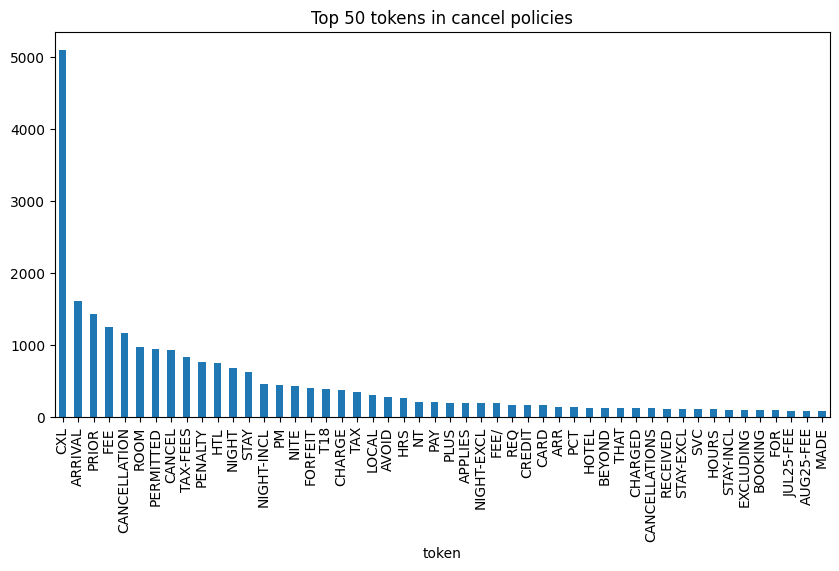

In [32]:
import matplotlib.pyplot as plt

tokens_df = pd.DataFrame(all_tokens.most_common(50), columns=["token","count"])
tokens_df.plot(kind="bar", x="token", y="count", legend=False, figsize=(10,5))
plt.title("Top 50 tokens in cancel policies")
plt.show()